In [2]:
# Importing Packages
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
# Creating Outcome
def Outcome(loss_prob=0.3, be_prob=0.4, win_prob=0.3):
    return np.random.choice(np.arange(-1, 2), p=[loss_prob, be_prob, win_prob])

In [90]:
# Inputs
num_simulations = 10000
max_num_trades = 100
num_trades = range(max_num_trades+1)
risk_pct = 0.03
risk_reward = 3

Average win probability after 10000 runs: 0.2999299999999987
Median ending balance after 10000 runs: $243525.9293700597
Lowest Equity after 10000 runs is on average at trade number 4.49: at value of $1985.2256573679324


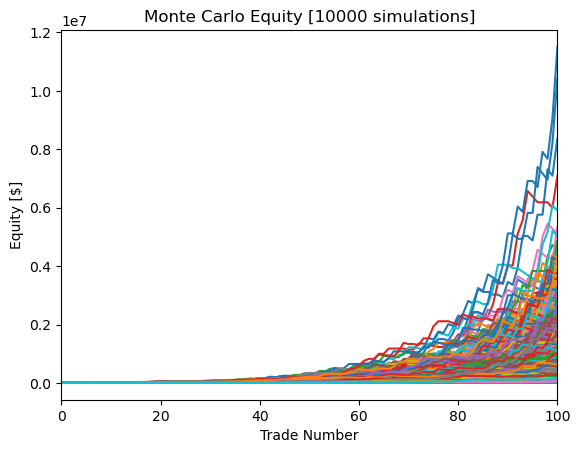

In [161]:
# Tracking
win_probability = []
end_equity = []
lowest_equity = []
lowest_equity_trade_number = []

# For loop to run for the number of simulations desired
for i in range(num_simulations):
    equity = [4000]
    risk = [risk_pct]
    
    # get vector of outcomes
    outcomes = np.array([Outcome(loss_prob=0.4, be_prob=0.3, win_prob=0.3) for i in range(max_num_trades)])
    
    # calculate risk multiples sequentially
    for o in outcomes[1:]:
        if risk[-1] < risk_pct * risk_reward:
            if o == 1:
                risk.append(risk[-1] + risk_pct)
            elif o == 0:
                risk.append(risk[-1])
            else:
                risk.append(risk_pct)
        else:
            risk.append(risk_pct)
    
    # get vector of profit multipliers based on the outcomes
    profit_multiplier = risk * np.where(outcomes == 1, risk_reward, outcomes) + 1
    
    # calculate profits sequentially
    for p in profit_multiplier:
        equity.append(equity[-1]*p)
        
    num_wins = len(profit_multiplier[profit_multiplier > 1]) 
        
# Store tracking variables and add line to figure
    win_probability.append(num_wins/num_trades[-1])
    end_equity.append(equity[-1])
    lowest_equity.append(min(equity))
    lowest_equity_trade_number.append(min(range(len(equity)), key=equity.__getitem__))
    plt.plot(num_trades, equity)

# Format figure
plt.title("Monte Carlo Equity [" + str(num_simulations) + " simulations]")
plt.xlabel("Trade Number")
plt.ylabel("Equity [$]")
plt.xlim([0, max_num_trades])


# Averaging win probability and end equity
overall_win_probability = sum(win_probability)/len(win_probability)
overall_end_balance = np.median(end_equity)

lowest_equity = min(lowest_equity)
lowest_equity_trade_number = np.array(lowest_equity_trade_number) # first convert to np.array()
average_lowest_equity_number = round(lowest_equity_trade_number[np.nonzero(lowest_equity_trade_number)].mean(), 2) # then get the non-zero values and computer average

# Displaying the averages
print("Average win probability after " + str(num_simulations) + " runs: " + str(overall_win_probability))
print("Median ending balance after " + str(num_simulations) + " runs: $" + str(overall_end_balance))
print("Lowest Equity after " + str(num_simulations) + " runs is on average at trade number " + str(average_lowest_equity_number) + ": at value of $" + str(lowest_equity))

In [134]:
# calculate risk multiples sequentially
risk = [risk_pct]
for o in outcomes[1:]:
    if risk[-1] < risk_pct * risk_reward:
        if o == 1:
            risk.append(risk[-1] + risk_pct)
        elif o == 0:
            risk.append(risk[-1])
        else:
            risk.append(risk_pct)
    else:
        risk.append(risk_pct)

In [159]:
risk * np.where(outcomes == 1, 3, outcomes) + 1

array([1.  , 1.  , 1.18, 0.97, 1.  , 1.18, 0.97, 0.97, 0.97, 0.97, 1.18,
       0.97, 1.18, 1.  , 1.  , 1.27, 1.  , 1.  , 1.  , 1.  , 0.97, 0.97,
       1.  , 0.97, 0.97, 0.97, 1.18, 1.  , 1.27, 0.97, 1.18, 1.27, 1.09,
       1.18, 0.97, 0.97, 0.97, 0.97, 1.18, 1.27, 0.97, 1.18, 1.  , 1.  ,
       1.27, 1.  , 1.18, 1.27, 1.09, 1.18, 0.97, 0.97, 1.18, 1.  , 0.97,
       1.18, 1.27, 0.97, 1.  , 1.18, 1.  , 0.97, 1.18, 1.  , 0.97, 1.18,
       0.97, 1.  , 0.97, 0.97, 0.97, 1.18, 0.97, 1.  , 1.18, 1.27, 0.97,
       1.  , 1.18, 1.27, 0.97, 1.18, 1.  , 1.  , 0.97, 0.97, 0.97, 1.18,
       1.  , 0.97, 0.97, 1.  , 1.18, 0.97, 0.97, 1.18, 0.97, 1.18, 1.  ,
       1.  ])